# Project 1: Classification For German Bank Credit Risk

### Part 2 - EDA/Preprocessing/Feature Engineering

#### By: Amin
For this notebook, I will be doing further in-depth EDA.  
<hr>

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Getting our Data

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## 3. EDA

### 3.1 Sex

In [3]:
df.groupby(['sex', 'risk']).size().unstack()

risk,bad,good
sex,,
female,109,201
male,191,499


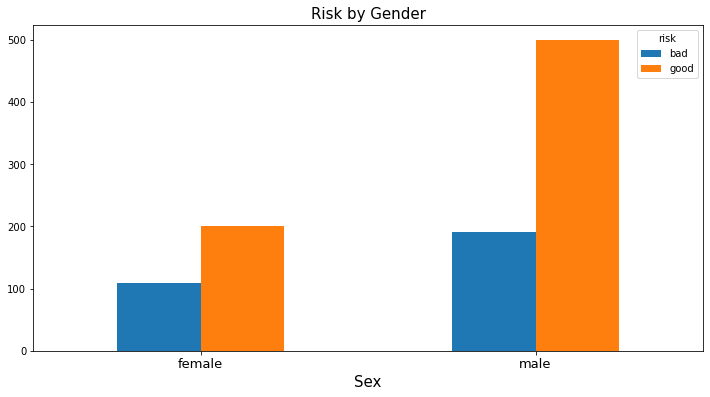

In [4]:
df.groupby(['sex', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Risk by Gender', fontsize=15)
plt.xlabel('Sex', fontsize=15)
plt.show()

**Observations**:  

- With respect to gender, and based on the 70:30 ratio of good risk to bad risk, males tend to be better risk as compared to females.  

### 3.2 Job Type

In [5]:
df.groupby(['job', 'risk']).size().unstack()

risk,bad,good
job,,
0,7,15
1,56,144
2,186,444
3,51,97


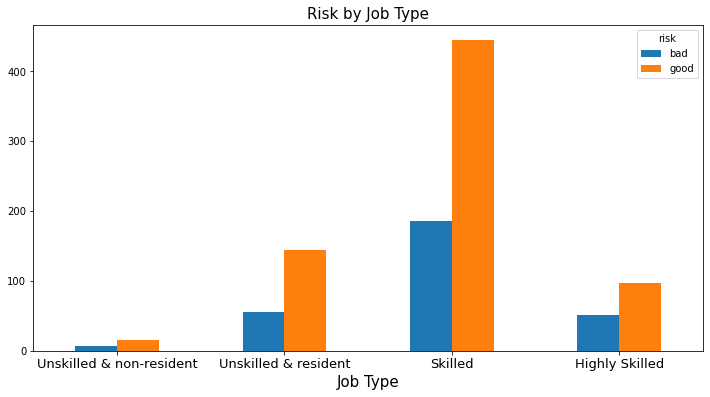

In [6]:
df.groupby(['job', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.xticks([0,1,2,3], ['Unskilled & non-resident', 'Unskilled & resident', 'Skilled', 'Highly Skilled'])
plt.xticks(rotation=0, fontsize=13)
plt.title('Risk by Job Type', fontsize=15)
plt.xlabel('Job Type', fontsize=15)
plt.show()

**Observations**:  

- With respect to job type, and based on the 70:30 ratio of good risk to bad risk, unskilled & non-resident, unskilled & resident, and skilled individuals tend to be better risk as compared to highly skilled ones.  

### 3.3 Housing Type

In [7]:
df.groupby(['housing', 'risk']).size().unstack()

risk,bad,good
housing,,
free,44,64
own,186,527
rent,70,109


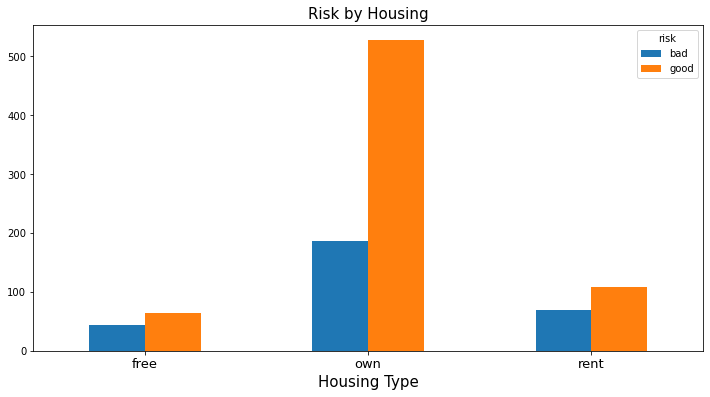

In [8]:
df.groupby(['housing', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Risk by Housing', fontsize=15)
plt.xlabel('Housing Type', fontsize=15)
plt.show()

**Observations**:  

- With respect to housing type, and based on the 70:30 ratio of good risk to bad risk, individuals who owns their housing tends to be better risk than those whose housing is either free or rent.  

### 3.4 Checking Account

In [9]:
df.groupby(['checking_account', 'risk']).size().unstack()

risk,bad,good
checking_account,,
little,181,487
moderate,105,164
rich,14,49


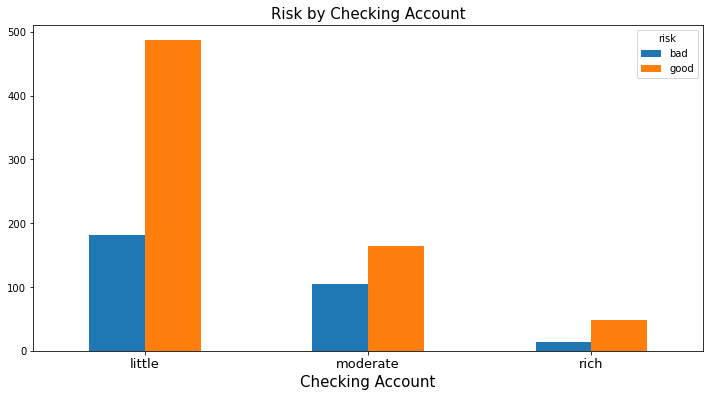

In [10]:
df.groupby(['checking_account', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Risk by Checking Account', fontsize=15)
plt.xlabel('Checking Account', fontsize=15)
plt.show()

**Observations**:  

- With respect to checking account, and based on the 70:30 ratio of good risk to bad risk, those who are classified as little & rich checking account had better risk as compared to those with moderate.  

### 3.5 Saving Account

In [11]:
df.groupby(['saving_accounts', 'risk']).size().unstack()

risk,bad,good
saving_accounts,,
little,249,537
moderate,34,69
quite rich,11,52
rich,6,42


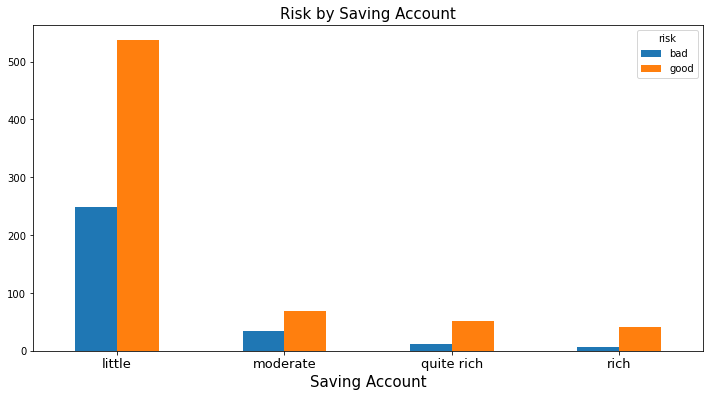

In [12]:
df.groupby(['saving_accounts', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Risk by Saving Account', fontsize=15)
plt.xlabel('Saving Account', fontsize=15)
plt.show()

**Observations**:  

- With respect to saving account, and based on the 70:30 ratio of good risk to bad risk, those who are classified as little, quite rich & rich saving account had better risk as compared to those with moderate.  

### 3.5 Purpose

In [13]:
df.groupby(['purpose', 'risk']).size().unstack()

risk,bad,good
purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


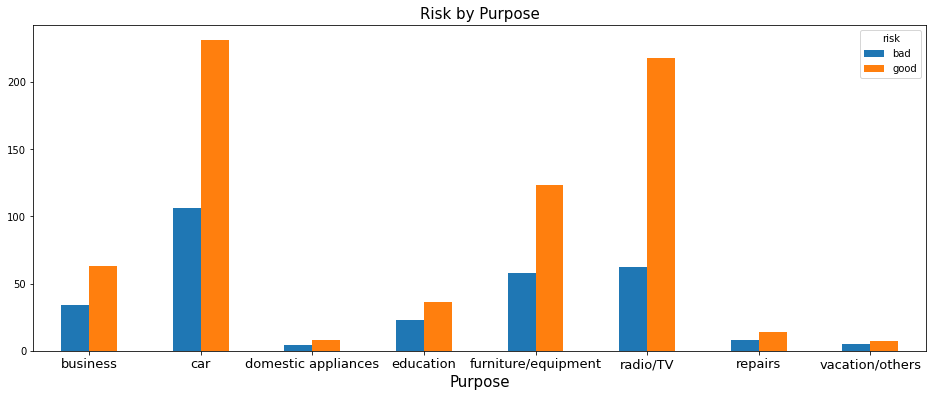

In [14]:
df.groupby(['purpose', 'risk']).size().unstack().plot(kind='bar', figsize=(16, 6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Risk by Purpose', fontsize=15)
plt.xlabel('Purpose', fontsize=15)
plt.show()

**Observations**:  

- With respect to purpose, and based on the 70:30 ratio of good risk to bad risk, those for the purpose of cars, furniture/equipment & radio are better risk than those of business, domestic appliances, repairs, education & vacation/others.  

### 3.7 Exploring Credit Amount

In [15]:
pivot1 = df.pivot_table(index = 'risk', columns = 'sex', values = 'credit_amount')
pivot1

sex,female,male
risk,,
bad,3471.183486,4204.602094
good,2555.975124,3158.454910


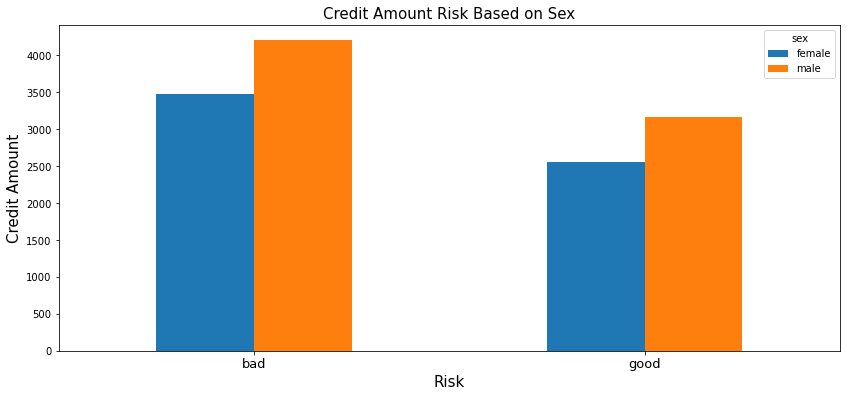

In [16]:
pivot1.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Credit Amount Risk Based on Sex', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Credit Amount', fontsize=15)
plt.show()

In [17]:
pivot2 = df.pivot_table(index = 'risk', columns = 'job', values = 'credit_amount')
pivot2

job,0,1,2,3
risk,,,,
bad,3221.142857,2387.553571,3642.650538,6816.745098
good,2523.000000,2347.229167,2831.475225,4709.268041


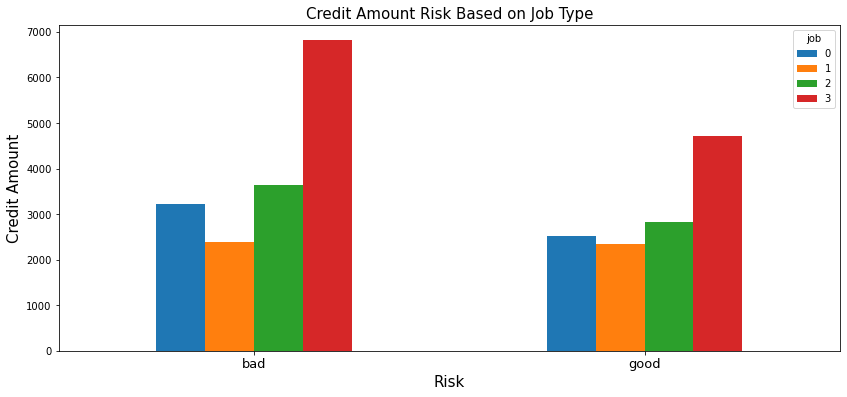

In [18]:
pivot2.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Credit Amount Risk Based on Job Type', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Credit Amount', fontsize=15)
plt.show()

In [19]:
pivot3 = df.pivot_table(index = 'risk', columns = 'saving_accounts', values = 'credit_amount')
pivot3

saving_accounts,little,moderate,quite rich,rich
risk,,,,
bad,3981.654618,4006.970588,3052.818182,3364.666667
good,3064.625698,3077.086957,2470.423077,2460.357143


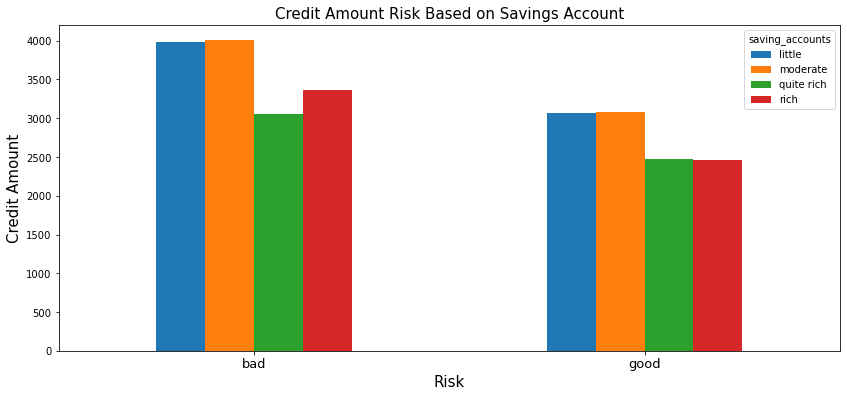

In [20]:
pivot3.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Credit Amount Risk Based on Savings Account', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Credit Amount', fontsize=15)
plt.show()

In [21]:
pivot4 = df.pivot_table(index = 'risk', columns = 'checking_account', values = 'credit_amount')
pivot4

checking_account,little,moderate,rich
risk,,,
bad,3635.519337,4754.752381,1725.714286
good,2970.067762,3233.932927,2306.775510


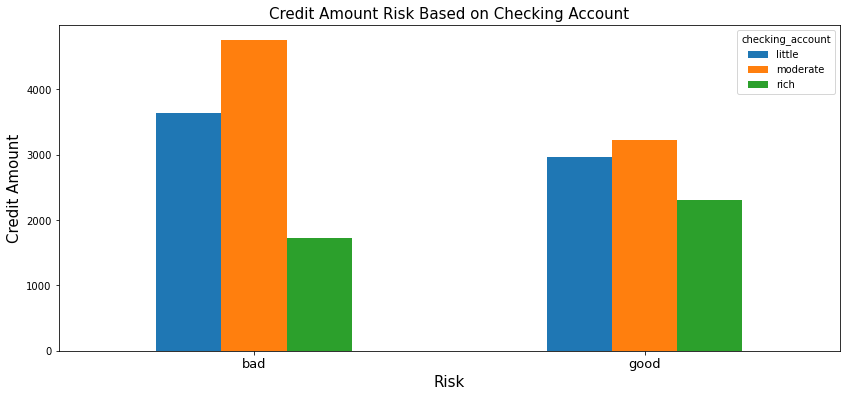

In [22]:
pivot4.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Credit Amount Risk Based on Checking Account', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Credit Amount', fontsize=15)
plt.show()

In [23]:
pivot5 = df.pivot_table(index = 'risk', columns = 'housing', values = 'credit_amount')
pivot5

housing,free,own,rent
risk,,,
bad,5536.454545,3693.801075,3582.671429
good,4472.921875,2837.576850,2827.064220


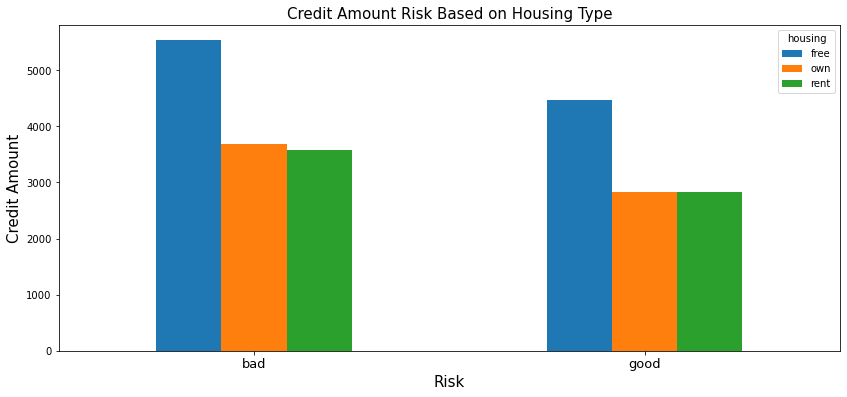

In [24]:
pivot5.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Credit Amount Risk Based on Housing Type', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Credit Amount', fontsize=15)
plt.show()

### Observations for Credit Amount:  

- One of our objectives was to determine the customer profile for both good and bad risk type. Using credit amount for analysis, we gained some insights into this.  
- The common theme among the variables observed and compared with respect to credit amount was that, beyond a certain amount of credit, the individual starts to become a bad risk.  

### 3.8 Exploring Age

In [25]:
pivot6 = df.pivot_table(index = 'risk', columns = 'sex', values = 'age')
pivot6

sex,female,male
risk,,
bad,30.009174,36.219895
good,34.318408,36.991984


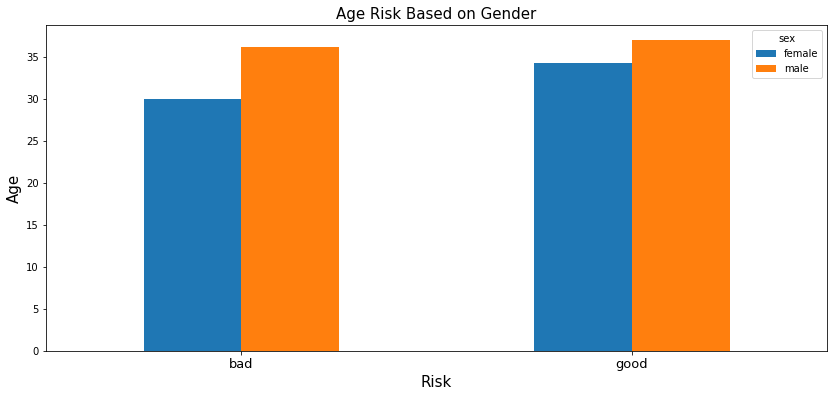

In [26]:
pivot6.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Age Risk Based on Gender', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

In [27]:
pivot7 = df.pivot_table(index = 'risk', columns = 'job', values = 'age')
pivot7

job,0,1,2,3
risk,,,,
bad,30.142857,33.928571,32.731183,39.019608
good,44.733333,37.555556,34.891892,39.030928


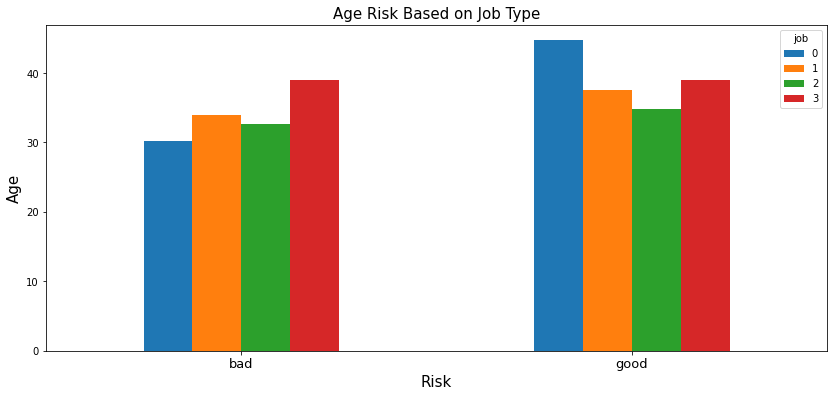

In [28]:
pivot7.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Age Risk Based on Job Type', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

In [29]:
pivot8 = df.pivot_table(index = 'risk', columns = 'saving_accounts', values = 'age')
pivot8

saving_accounts,little,moderate,quite rich,rich
risk,,,,
bad,34.020080,32.117647,33.909091,42.166667
good,36.433892,33.463768,37.538462,36.452381


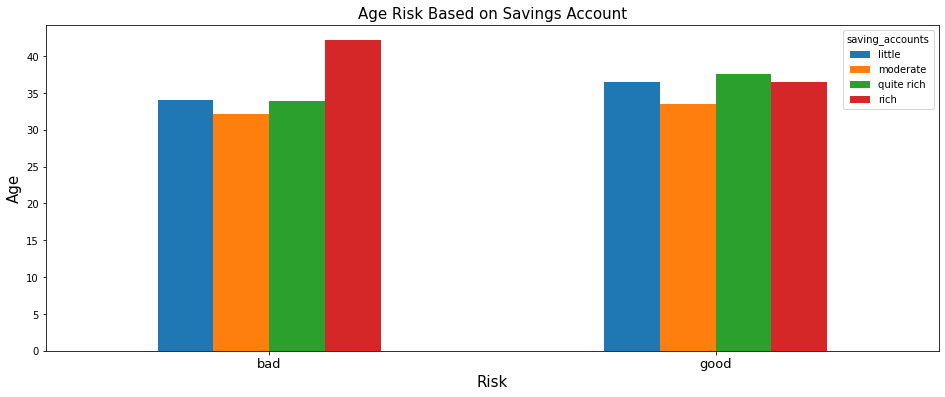

In [30]:
pivot8.plot(kind='bar', figsize=(16,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Age Risk Based on Savings Account', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

In [31]:
pivot9 = df.pivot_table(index = 'risk', columns = 'checking_account', values = 'age')
pivot9

checking_account,little,moderate,rich
risk,,,
bad,33.933702,33.790476,35.642857
good,36.741273,34.268293,37.632653


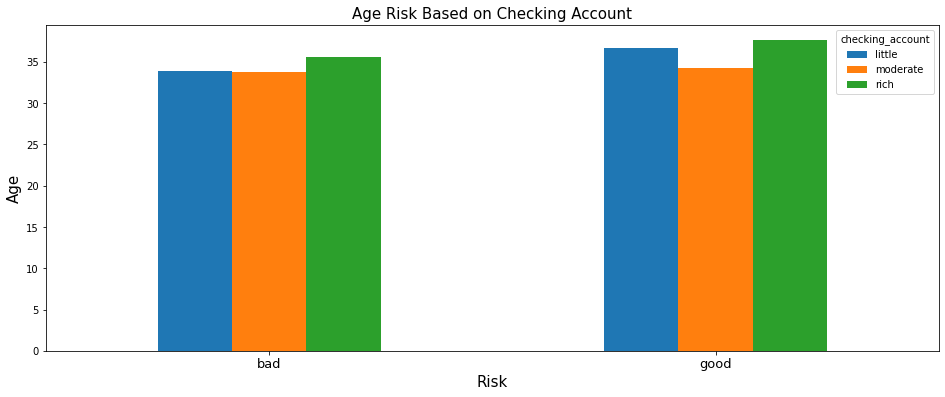

In [32]:
pivot9.plot(kind='bar', figsize=(16,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Age Risk Based on Checking Account', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

In [33]:
pivot10 = df.pivot_table(index = 'risk', columns = 'housing', values = 'age')
pivot10

housing,free,own,rent
risk,,,
bad,44.0000,33.311828,29.385714
good,43.6875,36.398482,31.000000


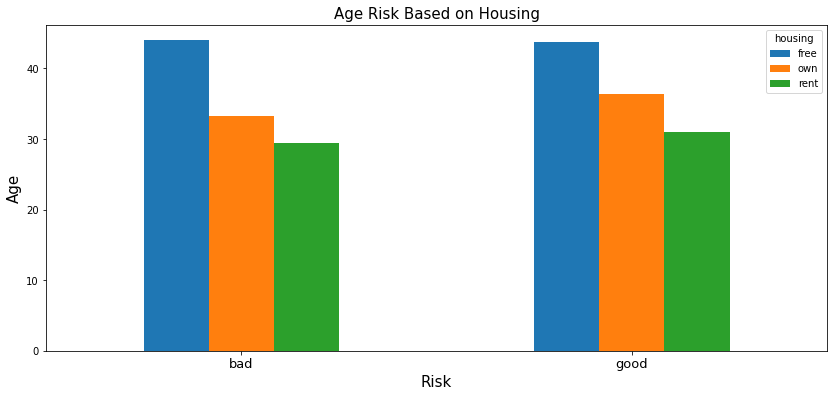

In [34]:
pivot10.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=0, fontsize=13)
plt.title('Age Risk Based on Housing', fontsize=15)
plt.xlabel('Risk', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

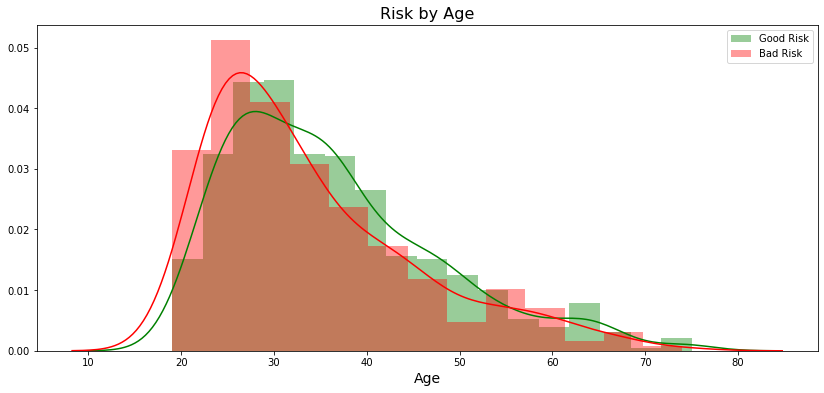

In [35]:
good_risk = df[df['risk'] == 'good']
bad_risk = df[df['risk'] == 'bad']

plt.figure(figsize=(14, 6))
sns.distplot(good_risk["age"], color="g", label='Good Risk')
sns.distplot(bad_risk["age"], color='r', label='Bad Risk')
plt.title('Risk by Age', fontsize=16)
plt.ylabel('')
plt.xlabel('Age', fontsize=14)
plt.legend()
plt.show()

### Observations for Age:  

- The age variable had a similar results to the credit amount. Using age for analysis, we gained some insights into this.  

- As with credit amount, the common theme observed and compared with respect to age was that generally, those who are older tend to be a better risk as opposed to younger individuals.  

### 3.9 Exploring Duration

In [36]:
pt1 = df.pivot_table(index = 'risk', columns = 'sex', values = 'duration')
pt1

sex,female,male
risk,,
bad,22.926606,25.963351
good,17.547264,19.875752


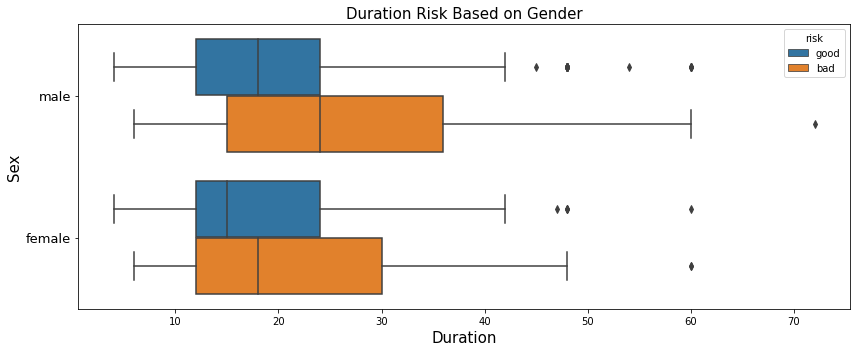

In [37]:
plt.figure(figsize = (12, 5))
sns.boxplot(y = "sex", x = "duration", hue = 'risk', data = df)
plt.title('Duration Risk Based on Gender', fontsize = 15)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('Sex', fontsize = 15)
plt.yticks(rotation = 0, fontsize = 13)
plt.tight_layout()
plt.show()

In [38]:
pt2 = df.pivot_table(index = 'risk', columns = 'job', values = 'duration')
pt2

job,0,1,2,3
risk,,,,
bad,15.857143,20.750000,25.661290,27.686275
good,18.066667,14.895833,19.630631,23.845361


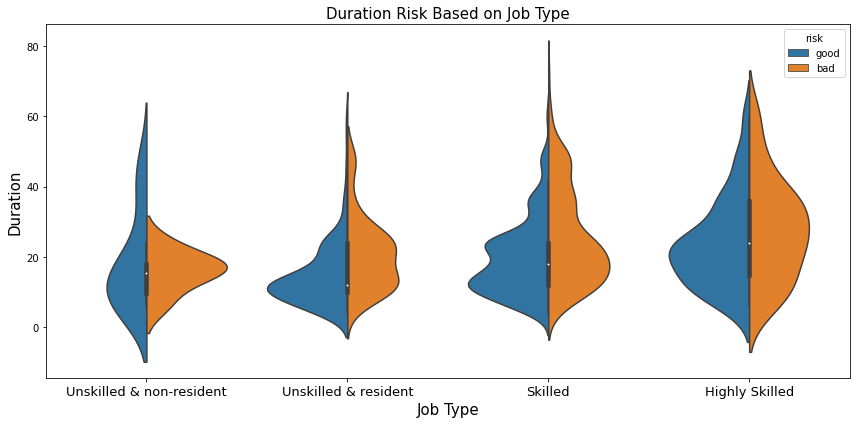

In [39]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = "job", y = "duration", hue = 'risk', data = df, split = True)
plt.title('Duration Risk Based on Job Type', fontsize = 15)
plt.xlabel('Job Type', fontsize = 15)
plt.ylabel('Duration', fontsize = 15)
plt.xticks([0,1,2,3], ['Unskilled & non-resident', 'Unskilled & resident', 'Skilled', 'Highly Skilled'], 
           rotation = 0, fontsize = 13)
plt.tight_layout()
plt.show()

In [40]:
pt3 = df.pivot_table(index = 'risk', columns = 'checking_account', values = 'duration')
pt3

checking_account,little,moderate,rich
risk,,,
bad,24.298343,26.733333,18.071429
good,19.119097,20.085366,17.142857


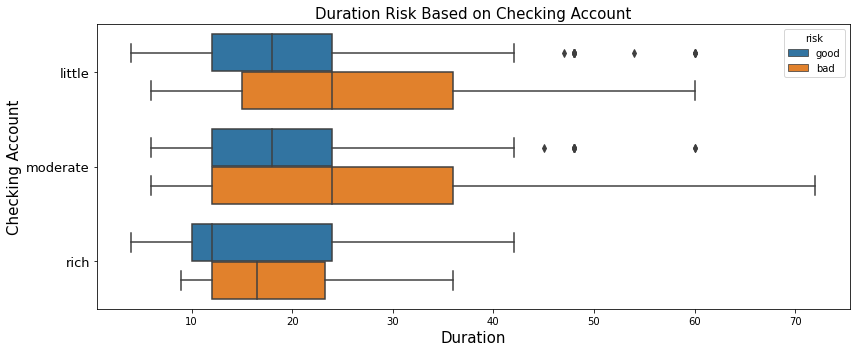

In [41]:
plt.figure(figsize = (12, 5))
sns.boxplot(y = "checking_account", x = "duration", hue = 'risk', data = df)
plt.title('Duration Risk Based on Checking Account', fontsize = 15)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('Checking Account', fontsize = 15)
plt.yticks(rotation = 0, fontsize = 13)
plt.tight_layout()
plt.show()

In [42]:
pt4 = df.pivot_table(index = 'risk', columns = 'saving_accounts', values = 'duration')
pt4

saving_accounts,little,moderate,quite rich,rich
risk,,,,
bad,24.730924,27.558824,22.636364,19.000000
good,19.227188,20.362319,18.269231,18.214286


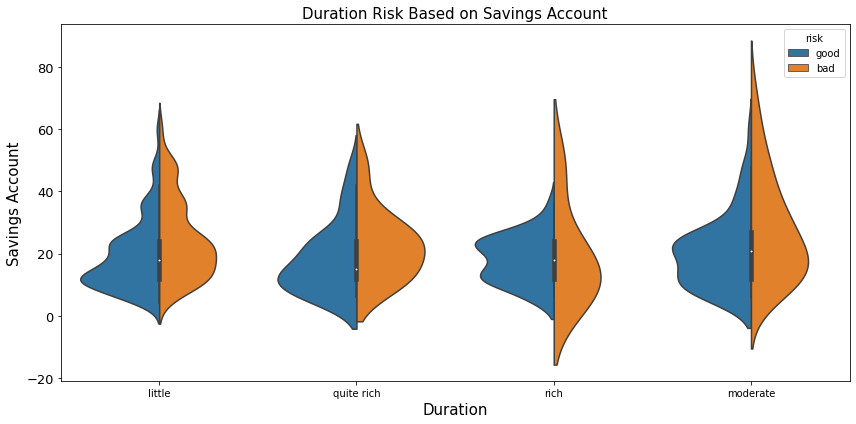

In [43]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = "saving_accounts", y = "duration", hue = 'risk', data = df, split = True)
plt.title('Duration Risk Based on Savings Account', fontsize = 15)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('Savings Account', fontsize = 15)
plt.yticks(rotation = 0, fontsize = 13)
plt.tight_layout()
plt.show()

In [44]:
pt5 = df.pivot_table(index = 'risk', columns = 'housing', values = 'duration')
pt5

housing,free,own,rent
risk,,,
bad,30.022727,23.940860,24.057143
good,25.687500,19.053131,16.146789


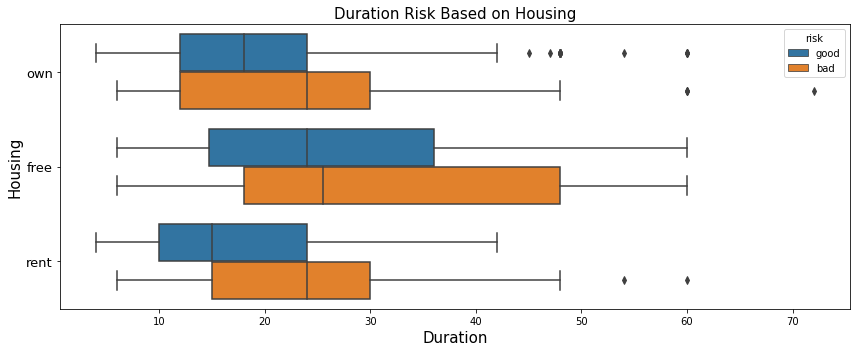

In [45]:
plt.figure(figsize = (12, 5))
sns.boxplot(y = "housing", x = "duration", hue = 'risk', data = df)
plt.title('Duration Risk Based on Housing', fontsize = 15)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('Housing', fontsize = 15)
plt.yticks(rotation = 0, fontsize = 13)
plt.tight_layout()
plt.show()

### Observations for Duration:  

- The duration variable had a similar results to the credit amount & age. Using duration for analysis, we gained some insights into this.  

- As with credit amount & age, the common theme observed and compared with respect to duration was that generally, shorter durations tend to be a better risk as opposed to longer ones.  

## 4. Feature Engineering  

<strong>Action Plan:</strong>  

1) Create an age class column, 1 to 5. 1 will be those aged 19-29, 2 are those aged 30-39, 3 are those aged 40-49, 4 are those aged 50-59, and lastly 5 will be those aged 60 years old onwards.  

2) Classify credit amount into 4 segments using the pandas.cut() method to prepare it for the model.  

3) <strong>Purpose:</strong> I will be consolidating the bottom 3 into 1 called "others" as they represent a small amount.  

4) <strong>Duration:</strong> I will be classifying this column into 6. 1 is for duration less than or equal to 12, 2 is for duration of less than or equal to 24, and so forth until 6.  

5) <strong>Risk:</strong> I will be changing good to 0 and bad to 1.  

6) I will be applying pandas.get_dummies() method for the sex, housing, saving_accounts, checking_account & purpose columns.  

### 4.1 Creating Age Classes

In [46]:
def age_ranges(x):
    if x >= 60:
        age_class = 5
    elif x >= 50 and x < 60:
        age_class = 4
    elif x >= 40 and x < 50:
        age_class = 3
    elif x >= 30 and x < 40:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [47]:
df['age'] = df['age'].apply(age_ranges)
df['age'].value_counts(normalize = True)*100

1    37.1
2    33.0
3    17.4
4     7.4
5     5.1
Name: age, dtype: float64

### 4.2 Credit Amount

In [48]:
df['credit'] = pd.cut(df['credit_amount'], bins = 4, labels = ['1', '2', '3', '4'])
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,credit
0,5,male,2,own,little,little,1169,6,radio/TV,good,1
1,1,female,2,own,little,moderate,5951,48,radio/TV,bad,2
2,3,male,1,own,little,little,2096,12,education,good,1
3,3,male,2,free,little,little,7882,42,furniture/equipment,good,2
4,4,male,2,free,little,little,4870,24,car,bad,2


In [49]:
df.drop(columns = 'credit_amount',axis = 1, inplace = True)

### 4.3 Purpose

In [50]:
df['purpose'] = np.where(df['purpose'] == 'repairs', 'others', 
                         np.where(df['purpose'] == 'domestic appliances', 'others', 
                                  np.where(df['purpose'] == 'vacation/others', 'others', df['purpose'])))

### 4.4 Duration

In [51]:
def duration_ranges(x):
    if x >= 60:
        duration_class = 6
    elif x >= 48 and x < 60:
        duration_class = 5
    elif x >= 36 and x < 48:
        duration_class = 4
    elif x >= 24 and x < 36:
        duration_class = 3
    elif x >= 12 and x < 24:
        duration_class = 2
    else:
        duration_class = 1
    return duration_class

In [52]:
df['duration'] = df['duration'].apply(duration_ranges)
df['duration'].value_counts(normalize = True)*100

2    40.6
3    24.4
1    18.0
4    10.6
5     5.0
6     1.4
Name: duration, dtype: float64

### 4.5 Changing the Risk

In [53]:
df['risk'].replace('bad', 1, inplace=True)
df['risk'].replace('good', 0, inplace=True)

### 4.6 Applying pd.dummies_get()

In [54]:
new_df = pd.get_dummies(df, columns = ['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose'],drop_first=True)
new_df.head()

,age,job,duration,risk,credit,sex_male,housing_own,housing_rent,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_moderate,checking_account_rich,purpose_car,purpose_education,purpose_furniture/equipment,purpose_others,purpose_radio/TV
0,5,2,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1
1,1,2,5,1,2,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,1,2,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
3,3,2,4,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0
4,4,2,3,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0


In [55]:
new_df.shape

(1000, 18)

## 5. Correlation & Heatmap

In [56]:
new_df.corr()

,age,job,duration,risk,sex_male,housing_own,housing_rent,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_moderate,checking_account_rich,purpose_car,purpose_education,purpose_furniture/equipment,purpose_others,purpose_radio/TV
age,1.000000,0.025593,-0.023365,-0.083026,0.162323,-0.008084,-0.192103,-0.060014,0.041498,0.037113,-0.071453,0.016124,0.083757,0.077986,-0.100247,0.042951,-0.053197
job,0.025593,1.000000,0.206594,0.032735,0.070298,-0.059393,-0.039195,0.004472,-0.037499,-0.017128,-0.004059,-0.050099,0.036762,-0.021672,0.013422,-0.026189,-0.027683
duration,-0.023365,0.206594,1.000000,0.214060,0.080765,-0.077213,-0.062658,0.044480,-0.033945,-0.045872,0.072166,-0.077436,-0.004534,-0.020323,-0.062304,0.020294,-0.041106
risk,-0.083026,0.032735,0.214060,1.000000,-0.075493,-0.134589,0.092785,0.022255,-0.070954,-0.085749,0.119581,-0.044009,0.022621,0.049085,0.020971,0.033334,-0.106922
sex_male,0.162323,0.070298,0.080765,-0.075493,1.000000,0.119638,-0.222845,-0.000498,0.031414,-0.041673,-0.012726,-0.004183,0.047893,-0.052397,-0.100467,0.002684,0.008668
housing_own,-0.008084,-0.059393,-0.077213,-0.134589,0.119638,1.000000,-0.735968,-0.017738,0.000737,0.028707,0.001012,0.018934,-0.099526,-0.075684,-0.040496,0.023237,0.134705
housing_rent,-0.192103,-0.039195,-0.062658,0.092785,-0.222845,-0.735968,1.000000,0.030578,0.007762,0.004979,-0.000888,-0.035183,0.014773,-0.006211,0.105700,-0.052723,-0.070414
saving_accounts_moderate,-0.060014,0.004472,0.044480,0.022255,-0.000498,-0.017738,0.030578,1.000000,-0.087866,-0.076089,0.143136,-0.020162,0.029852,-0.015038,-0.082398,0.019819,-0.013482
saving_accounts_quite rich,0.041498,-0.037499,-0.033945,-0.070954,0.031414,0.000737,0.007762,-0.087866,1.000000,-0.058224,-0.055198,0.000525,-0.028134,-0.012524,0.006382,0.002004,0.049134
saving_accounts_rich,0.037113,-0.017128,-0.045872,-0.085749,-0.041673,0.028707,0.004979,-0.076089,-0.058224,1.000000,0.011478,-0.000462,0.018052,-0.016518,0.028091,-0.004645,-0.046259


In [57]:
corr = new_df.corr()['risk'].sort_values(ascending=False)
corr

risk                           1.000000
duration                       0.214060
checking_account_moderate      0.119581
housing_rent                   0.092785
purpose_education              0.049085
purpose_others                 0.033334
job                            0.032735
purpose_car                    0.022621
saving_accounts_moderate       0.022255
purpose_furniture/equipment    0.020971
checking_account_rich         -0.044009
saving_accounts_quite rich    -0.070954
sex_male                      -0.075493
age                           -0.083026
saving_accounts_rich          -0.085749
purpose_radio/TV              -0.106922
housing_own                   -0.134589
Name: risk, dtype: float64

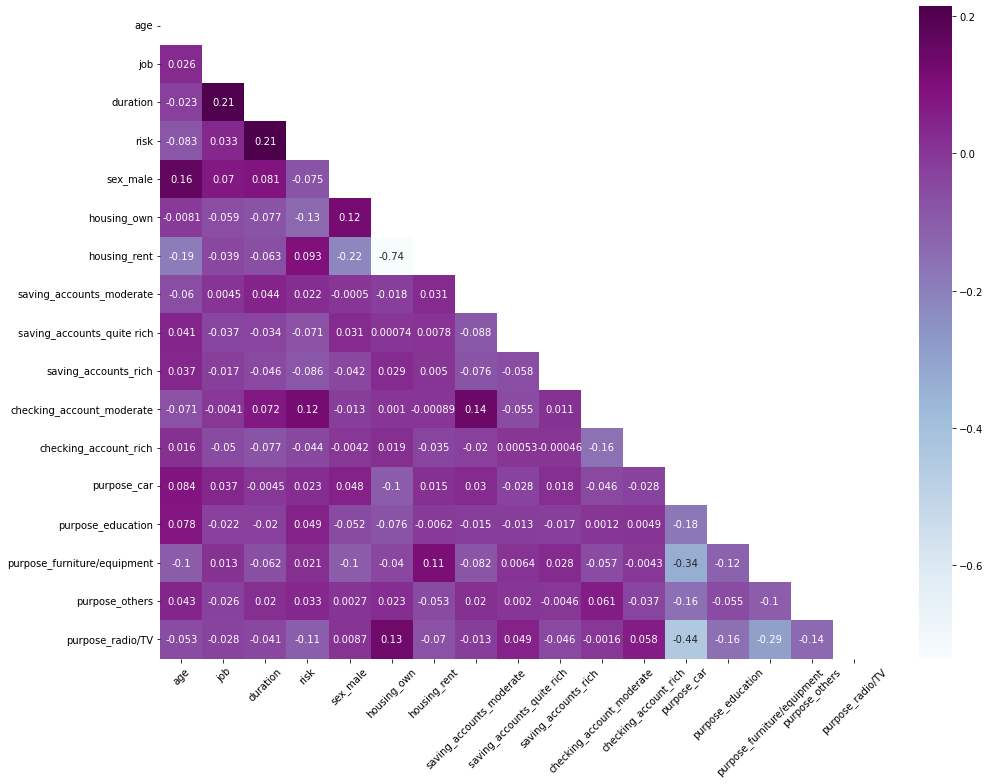

In [58]:
plt.figure(figsize=(16,12))
corr = new_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,cbar=True,annot=True,mask=mask,cmap='BuPu')
plt.xticks(rotation=45)
plt.show()

## 6. Saving the Cleaned Data for EDA

In [59]:
new_df.to_csv('finalized_data.csv', index = False)